Sanity checking the CIC Emu to make sure nothing went wrong there. 

In [1]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
from pearce.emulator import NashvilleHot

In [17]:
from GPy.kern import *

In [3]:
import numpy as np
from os import path

In [14]:
training_file = '/u/ki/swmclau2/des/cic_zheng07_v2/PearceCICCosmo.hdf5'

In [10]:
em_method = 'gp'

In [11]:
fixed_params = {'z':0.0}

In [18]:
hyperparams = {'kernel': (Linear(input_dim=7, ARD=True) + RBF(input_dim=7, ARD=True)+Bias(input_dim=7),
                            RBF(input_dim=5, ARD=True)+Bias(input_dim=5) ), \
               'optimize': False}

In [12]:
df = 0.1

In [20]:
emu = NashvilleHot(training_file, fixed_params = fixed_params,\
                   downsample_factor = df, hyperparams=hyperparams)

 /u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:2043: H5pyDeprecationWarning:dataset.value has been deprecated. Use dataset[()] instead.
 /u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:2044: H5pyDeprecationWarning:dataset.value has been deprecated. Use dataset[()] instead.
 /u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:2043: H5pyDeprecationWarning:dataset.value has been deprecated. Use dataset[()] instead.
 /u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:2044: H5pyDeprecationWarning:dataset.value has been deprecated. Use dataset[()] instead.
 /u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:2043: H5pyDeprecationWarning:dataset.value has been deprecated. Use dataset[()] instead.
 /u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:2044: H5pyDeprecationWarning:dataset.value has been deprecated. Use dataset[()] instead.
 /u/ki/swmclau2/.local

(array([], dtype=int64), array([], dtype=int64))


 /u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:2044: H5pyDeprecationWarning:dataset.value has been deprecated. Use dataset[()] instead.
 /u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:2043: H5pyDeprecationWarning:dataset.value has been deprecated. Use dataset[()] instead.
 /u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:2044: H5pyDeprecationWarning:dataset.value has been deprecated. Use dataset[()] instead.


In [28]:
#test_file = '/home/users/swmclau2/scratch/cic_zheng07_test_v2/PearceCICCosmoTest.hdf5'
test_file = '/u/ki/swmclau2/des/cic_zheng07_v2_test/PearceCICCosmoTest.hdf5'

In [29]:
pred_y, data_y = emu.goodness_of_fit(test_file, downsample_factor = df,  statistic = None)

 /u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:2043: H5pyDeprecationWarning:dataset.value has been deprecated. Use dataset[()] instead.
 /u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:2044: H5pyDeprecationWarning:dataset.value has been deprecated. Use dataset[()] instead.
 /u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:2043: H5pyDeprecationWarning:dataset.value has been deprecated. Use dataset[()] instead.
 /u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:2044: H5pyDeprecationWarning:dataset.value has been deprecated. Use dataset[()] instead.
 /u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:2043: H5pyDeprecationWarning:dataset.value has been deprecated. Use dataset[()] instead.
 /u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:2044: H5pyDeprecationWarning:dataset.value has been deprecated. Use dataset[()] instead.
 /u/ki/swmclau2/.local

(array([], dtype=int64), array([], dtype=int64))


 /u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:2044: H5pyDeprecationWarning:dataset.value has been deprecated. Use dataset[()] instead.
 /u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:2043: H5pyDeprecationWarning:dataset.value has been deprecated. Use dataset[()] instead.
 /u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:2044: H5pyDeprecationWarning:dataset.value has been deprecated. Use dataset[()] instead.


In [30]:
print (np.abs(10**pred_y - 10**data_y)/(10**data_y)).mean(axis =1)

[2.31835785e-01 1.69631598e-01 4.75856679e-01 8.32160878e-01
 1.23020242e+00 1.66850966e+00 2.18070192e+00 2.85245369e+00
 5.34646275e+00 1.29867547e+02 4.51755971e+03 3.43718762e+03
 1.05287356e+03 9.97623553e+02 5.68934097e+02]


In [31]:
print (np.abs(pred_y - data_y)/np.abs(data_y)).mean(axis =1)

[0.54297286 0.09785293 0.13387346 0.14304645 0.14505046 0.14423937
 0.14283419 0.14150798 0.1419023  0.17308866 0.20404288 0.15068048
 0.10627771 0.08259414 0.0539288 ]


In [32]:
emu._y_mean

array([-0.38972518, -0.65436999, -0.96248104, -1.26782625, -1.56161432,
       -1.8421254 , -2.10964311, -2.36543014, -2.61090864, -2.4689733 ,
       -3.79634855, -5.72953524, -7.01299247, -7.79401108, -8.35893625])

In [33]:
idx = 100

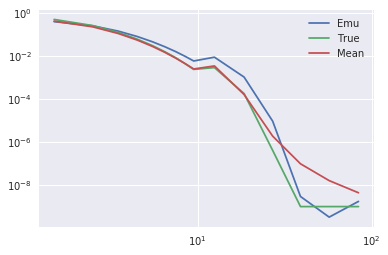

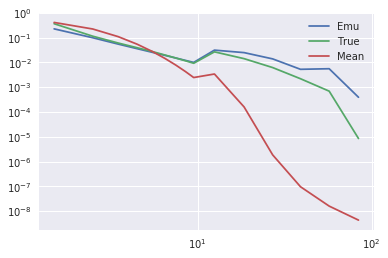

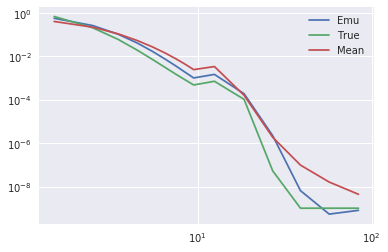

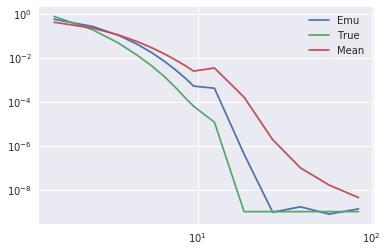

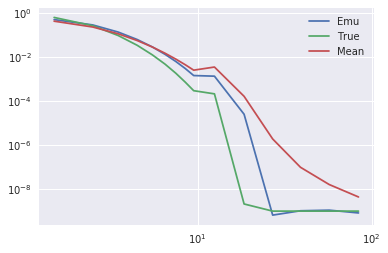

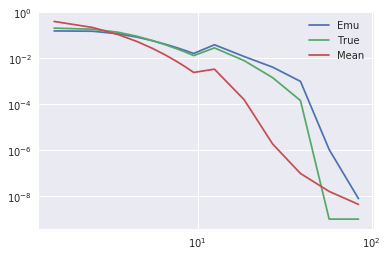

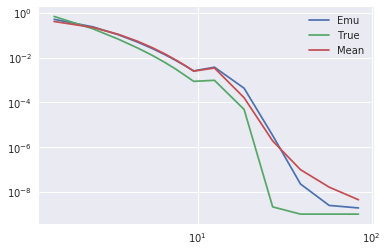

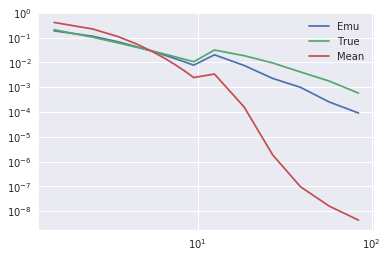

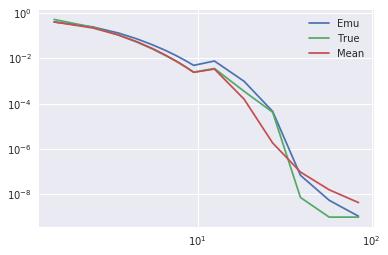

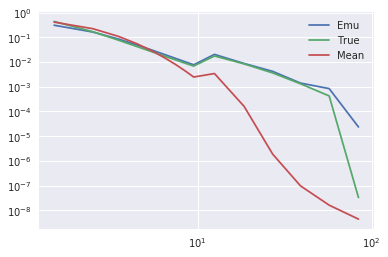

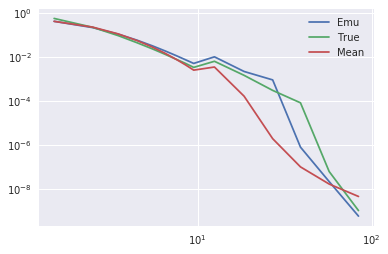

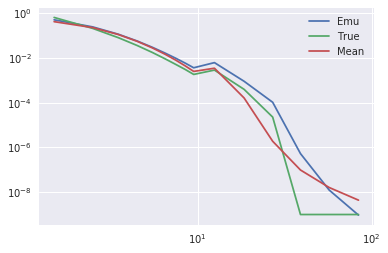

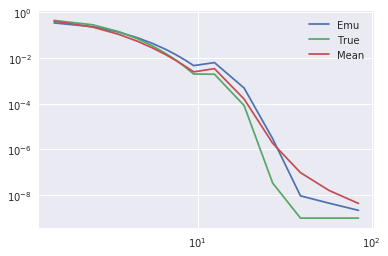

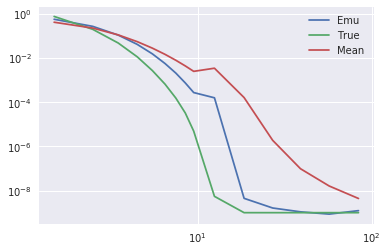

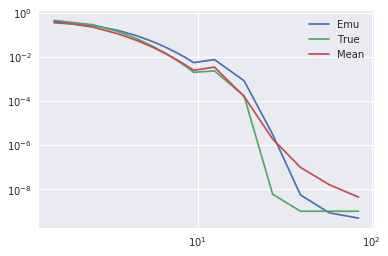

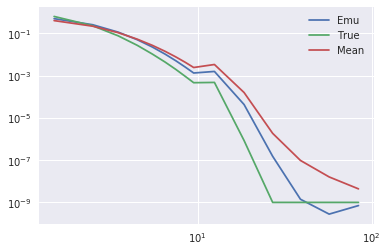

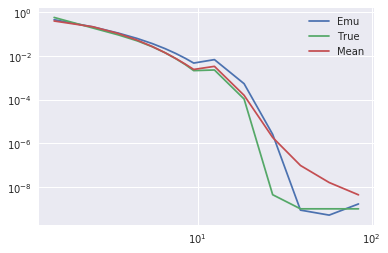

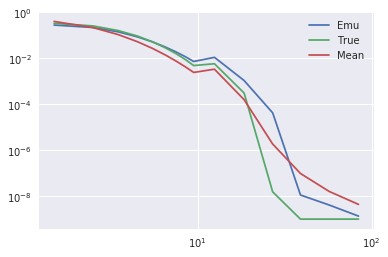

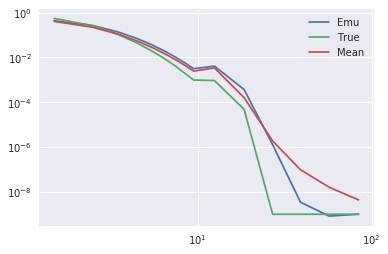

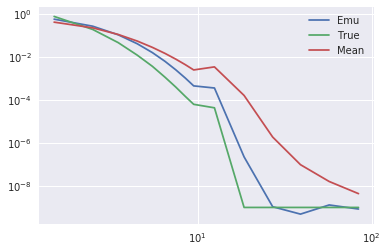

In [34]:
for idx in np.random.choice(pred_y.shape[1], 20, replace = False):
    plt.plot(emu.scale_bin_centers, 10**pred_y[:, idx], label = 'Emu')
    plt.plot(emu.scale_bin_centers, 10**data_y[:, idx], label = 'True')
    plt.plot(emu.scale_bin_centers, 10**emu._y_mean, label = 'Mean')

    #plt.yscale('log')
    plt.loglog();
    plt.legend(loc = 'best')
    plt.show();

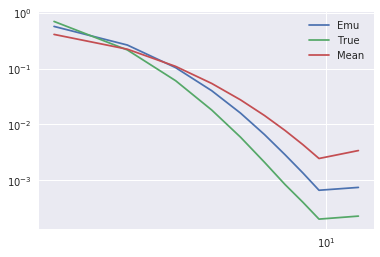

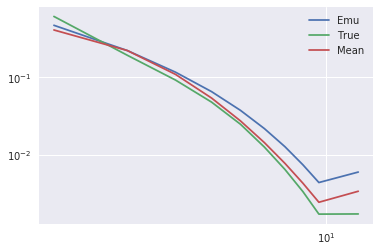

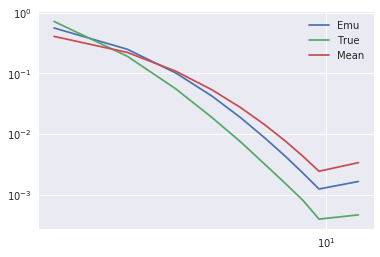

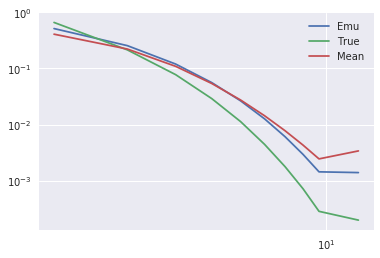

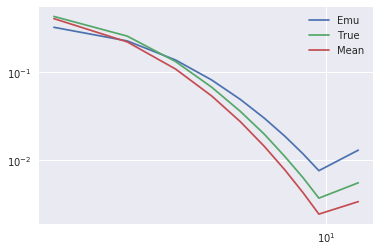

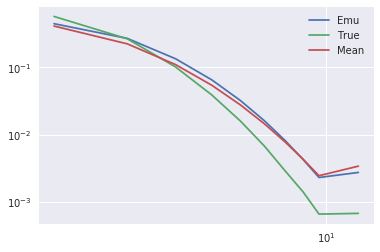

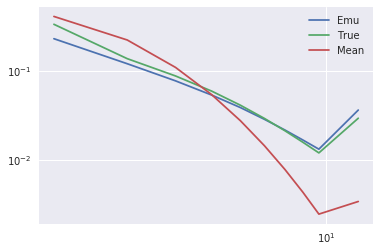

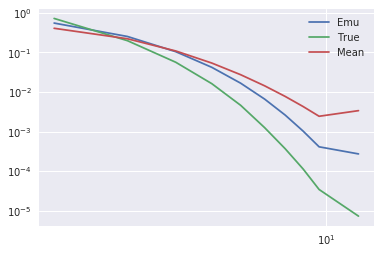

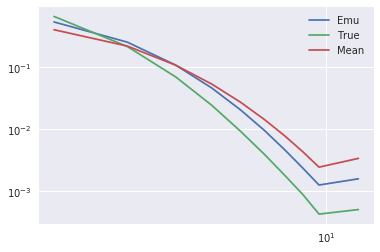

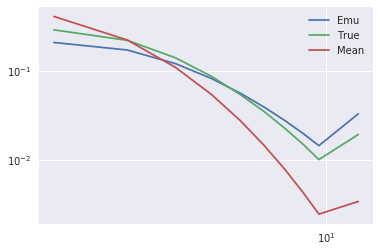

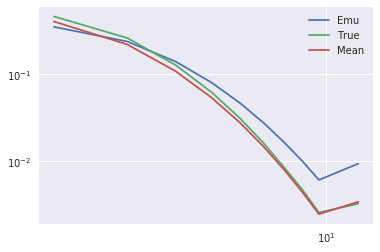

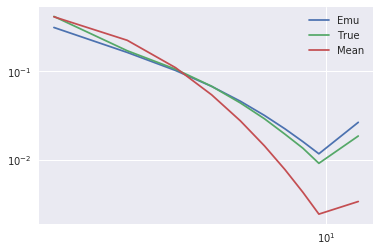

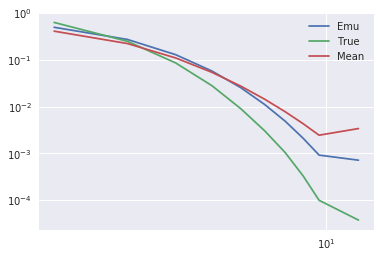

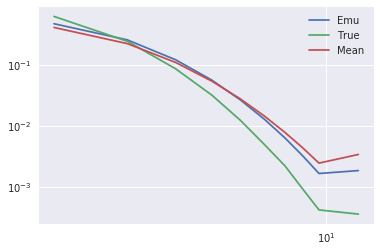

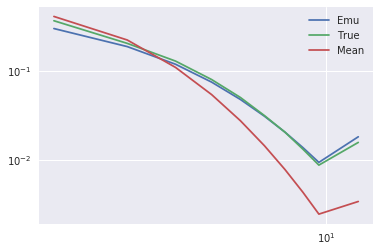

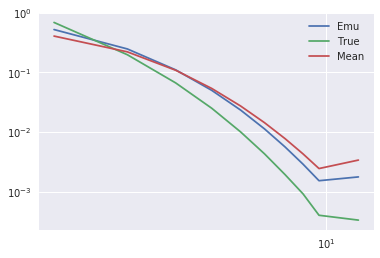

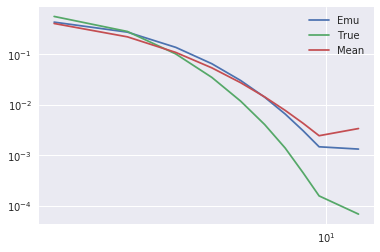

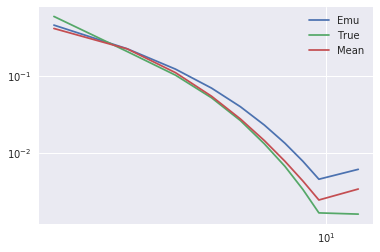

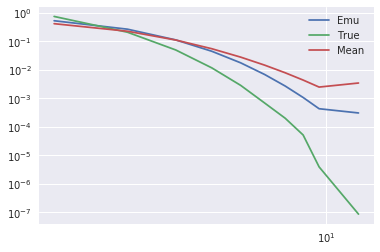

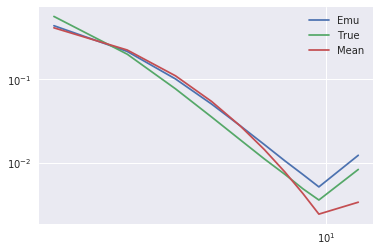

In [35]:
for idx in np.random.choice(pred_y.shape[1], 20, replace = False):
    plt.plot(emu.scale_bin_centers[:10], 10**pred_y[:10, idx], label = 'Emu')
    plt.plot(emu.scale_bin_centers[:10], 10**data_y[:10, idx], label = 'True')
    plt.plot(emu.scale_bin_centers[:10], 10**emu._y_mean[:10], label = 'Mean')

    #plt.yscale('log')
    plt.loglog();
    plt.legend(loc = 'best')
    plt.show();

In [36]:
test_mean = data_y.mean(axis = 1)
test_std = data_y.std(axis = 1)

In [51]:
data = emu.y.reshape((15, -1))

In [54]:
data = data*emu._y_std.reshape((-1, 1)) + emu._y_mean.reshape((-1,1))

In [55]:
data.shape

(15, 40000)

In [60]:
train_mean = data.mean(axis = 1 )
train_std = data.std(axis = 1)

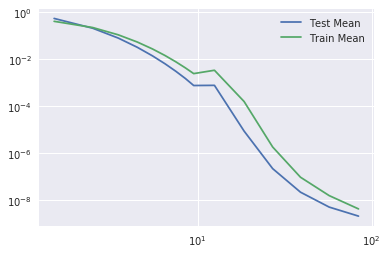

In [70]:
plt.plot(emu.scale_bin_centers, 10**test_mean, label = 'Test Mean')
plt.plot(emu.scale_bin_centers, 10**train_mean, label = 'Train Mean')

#plt.yscale('log')
plt.loglog();
plt.legend(loc = 'best')
plt.show();

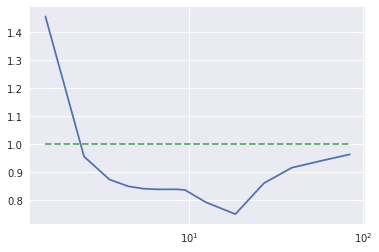

In [62]:
plt.plot(emu.scale_bin_centers, train_mean/test_mean)
plt.plot(emu.scale_bin_centers, np.ones_like(emu.scale_bin_centers), ls = '--')

plt.xscale('log')
#plt.loglog();
#plt.legend(loc = 'best')
plt.show();

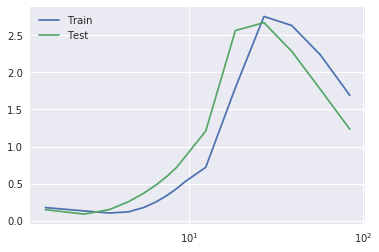

In [63]:
plt.plot(emu.scale_bin_centers, train_std, label = 'Train')
plt.plot(emu.scale_bin_centers, test_std, label = 'Test')
plt.legend(loc='best')
plt.xscale('log')
plt.show();

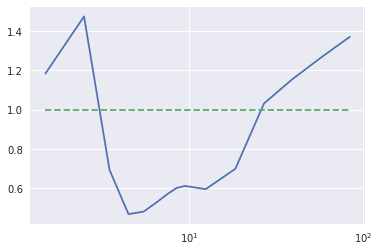

In [64]:
plt.plot(emu.scale_bin_centers, train_std/test_std)
plt.plot(emu.scale_bin_centers, np.ones_like(emu.scale_bin_centers), ls = '--')

plt.xscale('log')
#plt.loglog();
#plt.legend(loc = 'best')
plt.show();

In [67]:
emu.scale_bin_centers

array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 12.5, 18.5,
       27. , 39. , 57. , 84. ])

In [90]:
import h5py
test_mean = np.zeros((15,))
with h5py.File(test_file, 'r') as f:
    for key in f.keys():
        test_mean+=f[key]['a_1.000']['obs'][()].mean(axis = 0)
        
test_mean/=35

In [91]:
import h5py
train_mean = np.zeros((15,))
with h5py.File(training_file, 'r') as f:
    for key in f.keys():
        train_mean+=f[key]['a_1.000']['obs'][()].mean(axis = 0)
        
train_mean/=40

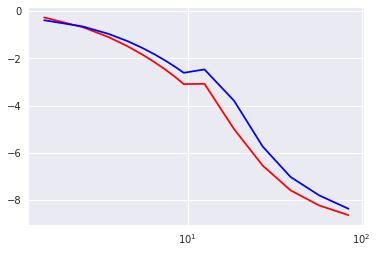

In [96]:
plt.plot(emu.scale_bin_centers, test_mean, color = 'r')
plt.plot(emu.scale_bin_centers, train_mean, color = 'b')
plt.xscale('log')

In [93]:
train_mean

array([-0.38972518, -0.65436999, -0.96248104, -1.26782625, -1.56161432,
       -1.8421254 , -2.10964311, -2.36543014, -2.61090864, -2.4689733 ,
       -3.79634855, -5.72953524, -7.01299247, -7.79401108, -8.35893625])